# University of Mannheim
## Data Mining I -- Group Project
### Wine Quality Prediction
#### Team members:
* Anna-Lena Blinken
* Max Darmstadt
* Nicolas Hautschek
* Erik Penther
* Nicolas Fürhaupter

## Importing Libraries and Data

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

ModuleNotFoundError: No module named 'google'

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import wine data

wine_data_raw = pd.read_csv('../winequalityN.csv')
wine_data_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Visualize and Analyse Data

In [4]:
# Print wine data info

wine_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
# Analyse the data by its mean etc.

wine_data_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Null Values

In [6]:
# Check data for null values

wine_data_raw.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
# Check class distribution

wine_data_raw.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### Class Distribution

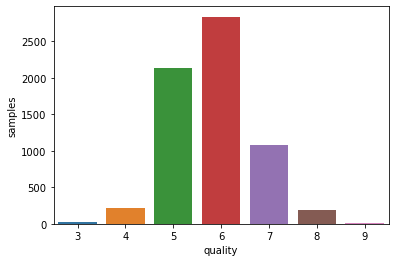

In [9]:
# Visualize class distribution

sns.barplot(x=wine_data_raw.quality.value_counts().index, y=wine_data_raw.quality.value_counts())
plt.ylabel('samples')
plt.xlabel('quality')
plt.show()

In [10]:
# Turn 10 classes into 3 classes

wine_data_raw['quality'] = wine_data_raw.quality.apply(lambda x: 2 if x>6 else (1 if x> 4 else 0))

In [11]:
# Check class distribution

wine_data_raw.quality.value_counts()

1    4974
2    1277
0     246
Name: quality, dtype: int64

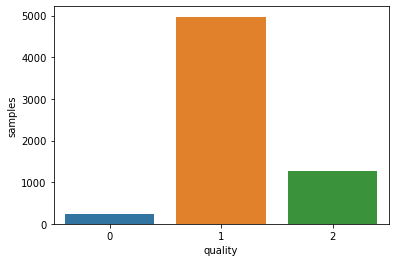

In [12]:
# Visualize class distribution

sns.barplot(x=wine_data_raw.quality.value_counts().index, y=wine_data_raw.quality.value_counts())
plt.ylabel('samples')
plt.xlabel('quality')
plt.show()

In [13]:
# Turn 10 classes into 2 classes

wine_data_2 = pd.read_csv('../winequalityN.csv')
wine_data_2['quality'] = wine_data_2.quality.apply(lambda x: 2 if x>5 else 0)

In [14]:
# Check class distribution

wine_data_2.quality.value_counts()

2    4113
0    2384
Name: quality, dtype: int64

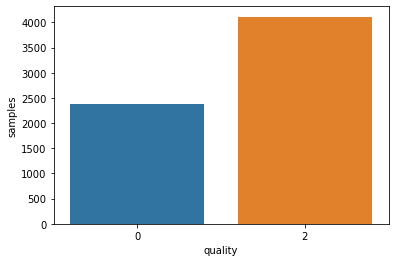

In [15]:
# Visualize class distribution

sns.barplot(x=wine_data_2.quality.value_counts().index, y=wine_data_2.quality.value_counts())
plt.ylabel('samples')
plt.xlabel('quality')
plt.show()

### Check duplicates

In [16]:
# Count duplicates and remove duplicates
display(len(wine_data_raw.index))
wine_data_raw.drop_duplicates()
display(len(wine_data_raw.index))

6497

6497

### Unique Values

In [17]:
# Count uniques values of each column
wine_data_raw.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   3
dtype: int64

### Distribution of Values

<AxesSubplot:>

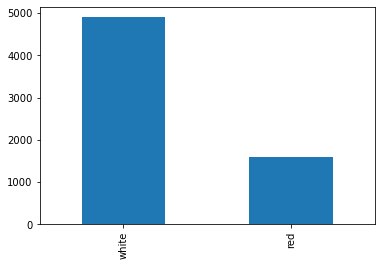

In [20]:
# Plot histogram for each categorical column

wine_data_raw['type'].value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

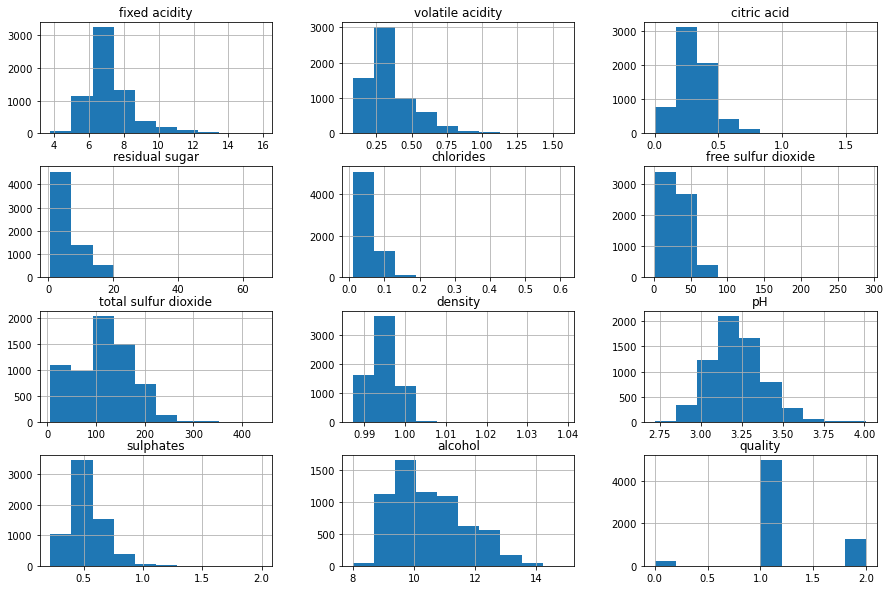

In [21]:
# Plot histogram for each numerical column

wine_data_raw.hist(figsize=(15, 10))

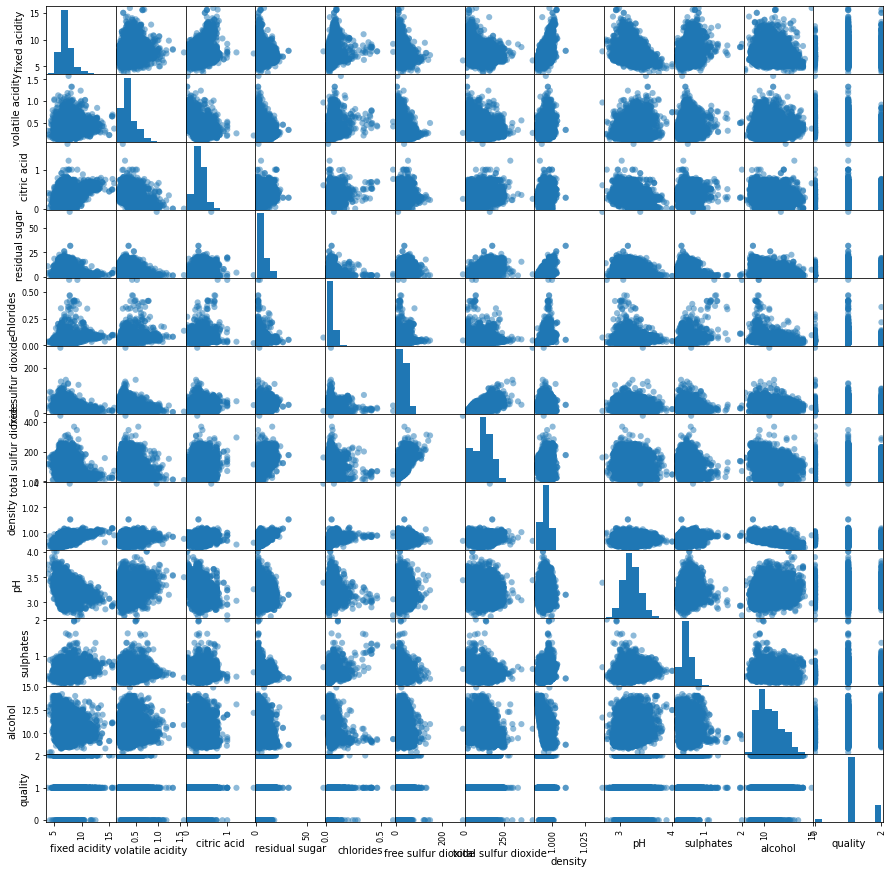

In [22]:
# Scatterplots

pd.plotting.scatter_matrix(wine_data_raw, figsize=(15, 15), s=150);

## Data Cleaning

In [23]:
# Delete Null-Values 

wine_data_raw = wine_data_raw.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
display(wine_data_raw.isnull().sum())
display(len(wine_data_raw.index))

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

6463

In [25]:
# One Hot Encoder for the attribute type

from sklearn import preprocessing

# show data before preprocessing
display(wine_data_raw.head())

# create the OrdinalEncoder
ordinal_encoder = preprocessing.OrdinalEncoder()

# preprocess the features Product and ZipCode
wine_data_raw[['type']] = ordinal_encoder.fit_transform(wine_data_raw[['type']])

# show the results
wine_data_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [27]:
# Normalisation of numerical values

# show data before preprocessing
display(wine_data_raw.head())

# create the normaliser
scaler = preprocessing.MinMaxScaler()

# preprocess the features ItemsBought and ItemsReturned
wine_data_raw[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']] = scaler.fit_transform(wine_data_raw[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

# show the results
display(wine_data_raw.head())

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,1
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,1
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,1
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,1
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,1


### Seperation of features and the target variable and test train split

In [28]:
# Seperation of features and the target variable in two different data frames
wine_data = wine_data_raw.copy()

features = wine_data.drop(columns='quality')
display(features.head())

target = wine_data.drop(columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
target = target['quality'].ravel()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362


In [29]:
# Train test split

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    features, target,test_size=0.35, random_state=42, stratify=target)

## Random Forest

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Create estimator and pipeline
random_forest = RandomForestClassifier(max_depth=2, random_state=0)
pipeline_rf = Pipeline([('estimator', random_forest)])

# Fit the model and predict the values for the train data
pipeline_rf.fit(data_train, target_train)
predictions_train_rf = pipeline_rf.predict(data_train)

### Evaluation

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import cross_val_score

# Predict values for the test data
predictions_test_rf = pipeline_rf.predict(data_test)

#### Makro F1-Score, Makro Precision, Makro Recall and Accuracy

In [33]:
from sklearn.metrics import f1_score

# Makro F1-Score
print("Makro F1-Score Train Data:")
f1_score_train_rf = f1_score(target_train, predictions_train_rf, average='macro')
display(f1_score_train_rf)

print("Makro F1-Score Test Data:")
f1_score_test_rf = f1_score(target_test, predictions_test_rf, average='macro')
display(f1_score_test_rf)

# Makro Precision Score
from sklearn.metrics import precision_score
print("Makro Precision Train Data:")
precision_train_rf = precision_score(target_train, predictions_train_rf, average='macro', zero_division = 0)
display(precision_train_rf)

print("Makro Precision Test Data:")
precision_test_rf = precision_score(target_test, predictions_test_rf, average='macro', zero_division = 0)
display(precision_test_rf)

# Makro Recall Score
from sklearn.metrics import recall_score
print("Makro Recall Train Data:")
recall_train_rf = recall_score(target_train, predictions_train_rf, average='macro')
display(recall_train_rf)

print("Makro Recall Test Data:")
recall_test_rf = recall_score(target_test, predictions_test_rf, average='macro')
display(recall_test_rf)

# Accuracy Score for the train data
print("Accuracy Score Train Data:")
accuracy_score_train_rf = cross_val_score(random_forest, data_train, target_train, cv=5, scoring="accuracy").mean()
display(accuracy_score_train_rf)

# Accuracy Score for the test data
print("Accuracy Score Test Data:")
accuracy_score_test_rf = cross_val_score(random_forest, data_test, target_test, cv=5, scoring="accuracy").mean()
display(accuracy_score_test_rf)

Makro F1-Score Train Data:


0.28905371993706447

Makro F1-Score Test Data:


0.2891224557891225

Makro Precision Train Data:


0.25515873015873014

Makro Precision Test Data:


0.25526587126233613

Makro Recall Train Data:


0.3333333333333333

Makro Recall Test Data:


0.3333333333333333

Accuracy Score Train Data:


0.7654761904761904

Accuracy Score Test Data:


0.7657973392721092

#### Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix
import itertools

# Function to plot a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion Matrix Train Data:


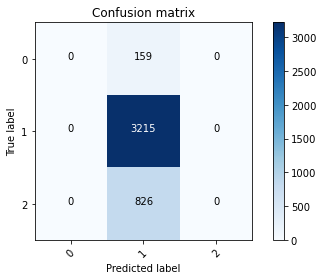

In [35]:
# Confusion Matrix for the training data
cnf_matrix_train_rf = confusion_matrix(target_train, predictions_train_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Train Data:")
plot_confusion_matrix(cnf_matrix_train_rf, classes=np.array([0,1,2]))

Confusion Matrix Test Data:


None

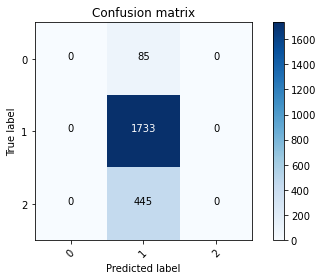

In [36]:
# Confusion Matrix for the test data
cnf_matrix_test_rf = confusion_matrix(target_test, predictions_test_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Test Data:")
display(plot_confusion_matrix(cnf_matrix_test_rf, classes=np.array([0,1,2])))

## Adoption of the Mode
1. Hyperparameter Tuning
2. Oversampling
3. Removing Outliers
4. Feature Selection
5. Reducing Train Data

In each step the best model, which was achieved until that stage, is utilized.

### Hyperparameter Tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Create an estimator
random_forest = RandomForestClassifier()

# Specify the parameter grid
parameters = {
    'bootstrap': [True],
    #'max_depth': range(5, 14),
    #'n_estimators': [100, 300, 500, 700],
    #'max_features': [None, sqrt, 0.3, 2],
    #'criterion': ['gini', 'entropy']
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    
}

# Specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create the grid search instance
#grid_search_estimator = GridSearchCV(knn_estimator, parameters, scoring='accuracy', cv=stratified_10_fold_cv, return_train_score=False)
grid_search_estimator = GridSearchCV(random_forest, parameters, scoring='f1-macro', cv=stratified_10_fold_cv, n_jobs = -1, verbose = 2, return_train_score=False)

# Run the grid search
grid_search_estimator.fit(data_train, target_train)

# Print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
#display(results)
    
# Print the best parameter setting
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

#### Model with Hyperparameter Tuning

Makro F1-Score Train Data:


0.6385721072781774

Makro F1-Score Test Data:


0.48637215209620144

Makro Precision Train Data:


0.9504390009822226

Makro Precision Test Data:


0.5197280825128926

Makro Recall Train Data:


0.5959727134825274

Makro Recall Test Data:


0.47375100224546207

Accuracy Score Train Data:


0.8145238095238095

Accuracy Score Test Data:


0.8051202406767078

Confusion Matrix Train Data:


None

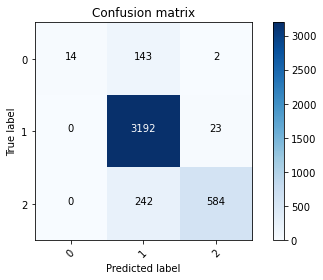

In [37]:
# Changing Hyperparameters
# Seperation of features and the target variable in two different data frames
random_forest = RandomForestClassifier(random_state=0, max_depth = 11, n_estimators = 500, max_features=0.3, min_samples_leaf=3,
    min_samples_split=8)

pipeline_rf = Pipeline([('estimator', random_forest)])

# Fit the model and predict the values for the train data
pipeline_rf.fit(data_train, target_train)
predictions_train_rf = pipeline_rf.predict(data_train)

# Predict values for the test data
predictions_test_rf = pipeline_rf.predict(data_test)

from sklearn.metrics import f1_score

# Makro F1-Score
print("Makro F1-Score Train Data:")
f1_score_train_rf = f1_score(target_train, predictions_train_rf, average='macro')
display(f1_score_train_rf)

print("Makro F1-Score Test Data:")
f1_score_test_rf = f1_score(target_test, predictions_test_rf, average='macro')
display(f1_score_test_rf)

# Makro Precision Score
from sklearn.metrics import precision_score
print("Makro Precision Train Data:")
precision_train_rf = precision_score(target_train, predictions_train_rf, average='macro', zero_division = 0)
display(precision_train_rf)

print("Makro Precision Test Data:")
precision_test_rf = precision_score(target_test, predictions_test_rf, average='macro', zero_division = 0)
display(precision_test_rf)

# Makro Recall Score
from sklearn.metrics import recall_score
print("Makro Recall Train Data:")
recall_train_rf = recall_score(target_train, predictions_train_rf, average='macro')
display(recall_train_rf)

print("Makro Recall Test Data:")
recall_test_rf = recall_score(target_test, predictions_test_rf, average='macro')
display(recall_test_rf)

# Accuracy Score for the train data
print("Accuracy Score Train Data:")
accuracy_score_train_rf = cross_val_score(random_forest, data_train, target_train, cv=5, scoring="accuracy").mean()
display(accuracy_score_train_rf)

# Accuracy Score for the test data
print("Accuracy Score Test Data:")
accuracy_score_test_rf = cross_val_score(random_forest, data_test, target_test, cv=5, scoring="accuracy").mean()
display(accuracy_score_test_rf)

# Confusion Matrix for the training data
cnf_matrix_train_rf = confusion_matrix(target_train, predictions_train_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Train Data:")
display(plot_confusion_matrix(cnf_matrix_train_rf, classes=np.array([0,1,2])))

Confusion Matrix Train Data:


None

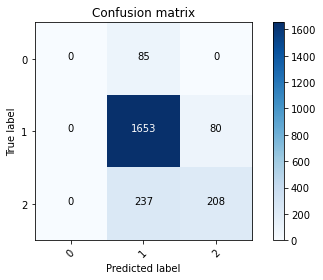

In [38]:
# Confusion Matrix for the training data
cnf_matrix_test_rf = confusion_matrix(target_test, predictions_test_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Train Data:")
display(plot_confusion_matrix(cnf_matrix_test_rf, classes=np.array([0,1,2])))

### Oversampling
On the basis of the model with the hypertuning of the parameters.

Makro F1-Score Train Data:


0.9332328877612123

Makro F1-Score Test Data:


0.5797378289271955

Makro Precision Train Data:


0.9347445518965753

Makro Precision Test Data:


0.5500464429313742

Makro Recall Train Data:


0.9338049519959576

Makro Recall Test Data:


0.6586873610495658

Accuracy Score Train Data:


0.8727478916330421

Accuracy Score Test Data:


0.792732932267816

Confusion Matrix Train Data:


None

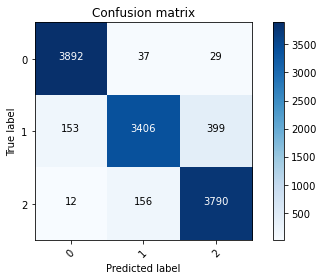

In [39]:
# Seperation of features and the target variable in two different data frames
features = wine_data.drop(columns=['quality'])
display(features.head())
target = wine_data.drop(columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
target = target['quality'].ravel()

# Train test split
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    features, target,test_size=0.2, random_state=42, stratify=target)

# Oversampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

data_train_smt = data_train.copy() # necessary? 
target_train_smt = target_train.copy() # necessary?

smt = SMOTE(random_state=42)
data_train, target_train = smt.fit_resample(data_train_smt, target_train_smt)

# Create estimator and pipeline
random_forest = RandomForestClassifier(random_state=0, max_depth = 11, n_estimators = 500, max_features=0.3, min_samples_leaf=3,
    min_samples_split=8)
pipeline_rf = Pipeline([('estimator', random_forest)])

# Fit the model and predict the values for the train data
pipeline_rf.fit(data_train, target_train)
predictions_train_rf = pipeline_rf.predict(data_train)

# Predict values for the test data
predictions_test_rf = pipeline_rf.predict(data_test)

from sklearn.metrics import f1_score

# Makro F1-Score
print("Makro F1-Score Train Data:")
f1_score_train_rf = f1_score(target_train, predictions_train_rf, average='macro')
display(f1_score_train_rf)

print("Makro F1-Score Test Data:")
f1_score_test_rf = f1_score(target_test, predictions_test_rf, average='macro')
display(f1_score_test_rf)

# Makro Precision Score
from sklearn.metrics import precision_score
print("Makro Precision Train Data:")
precision_train_rf = precision_score(target_train, predictions_train_rf, average='macro', zero_division = 0)
display(precision_train_rf)

print("Makro Precision Test Data:")
precision_test_rf = precision_score(target_test, predictions_test_rf, average='macro', zero_division = 0)
display(precision_test_rf)

# Makro Recall Score
from sklearn.metrics import recall_score
print("Makro Recall Train Data:")
recall_train_rf = recall_score(target_train, predictions_train_rf, average='macro')
display(recall_train_rf)

print("Makro Recall Test Data:")
recall_test_rf = recall_score(target_test, predictions_test_rf, average='macro')
display(recall_test_rf)

# Accuracy Score for the train data
print("Accuracy Score Train Data:")
accuracy_score_train_rf = cross_val_score(random_forest, data_train, target_train, cv=5, scoring="accuracy").mean()
display(accuracy_score_train_rf)

# Accuracy Score for the test data
print("Accuracy Score Test Data:")
accuracy_score_test_rf = cross_val_score(random_forest, data_test, target_test, cv=5, scoring="accuracy").mean()
display(accuracy_score_test_rf)

# Confusion Matrix for the training data
cnf_matrix_train_rf = confusion_matrix(target_train, predictions_train_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Train Data:")
display(plot_confusion_matrix(cnf_matrix_train_rf, classes=np.array([0,1,2])))

Confusion Matrix Test Data:


None

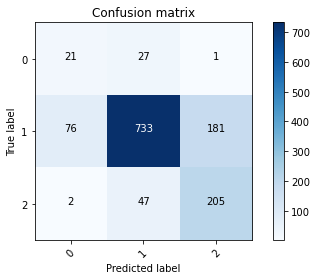

In [40]:
# Confusion Matrix for the test data
cnf_matrix_test_rf = confusion_matrix(target_test, predictions_test_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Test Data:")
display(plot_confusion_matrix(cnf_matrix_test_rf, classes=np.array([0,1,2])))

### Removing Outliers
On the basis of the model with the hypertuning of the parameters and oversampling.

In [44]:
# Deleting outliers
wine_data_outliers = wine_data_raw.copy()
wine_data_columns = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

# Identify outliers
for x in wine_data_columns:
    for y in x:
        q75,q25 = np.percentile(wine_data_outliers.loc[:,x],[95,5])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        wine_data_outliers.loc[wine_data[x] < min,x] = np.nan
        wine_data_outliers.loc[wine_data[x] > max,x] = np.nan
        
display(wine_data_outliers.isnull().sum())

# Drop outliers
wine_data_outliers = wine_data_outliers.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
display(wine_data_outliers.isnull().sum())
display(len(wine_data_outliers.index))

type                     0
fixed acidity            0
volatile acidity         1
citric acid              1
residual sugar           1
chlorides               47
free sulfur dioxide      2
total sulfur dioxide     0
density                  1
pH                       0
sulphates                8
alcohol                  0
quality                  0
dtype: int64

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

6406

Makro F1-Score Train Data:


0.9344379842148247

Makro F1-Score Test Data:


0.6096806232236647

Makro Precision Train Data:


0.9360941483269579

Makro Precision Test Data:


0.5745525793279441

Makro Recall Train Data:


0.9351875478438377

Makro Recall Test Data:


0.7078814217778376

Accuracy Score Train Data:


0.8729271015084044

Accuracy Score Test Data:


0.8049762889105058

Confusion Matrix Train Data:


None

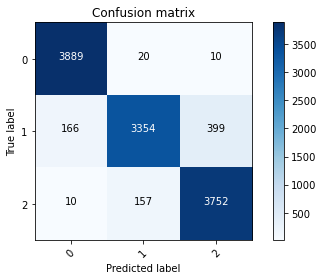

In [50]:
# Seperation of features and the target variable in two different data frames
features = wine_data_outliers.drop(columns=['quality'])
display(features.head())
target = wine_data_outliers.drop(columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
target = target['quality'].ravel()

# Train test split
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    features, target,test_size=0.2, random_state=42, stratify=target)

# Oversampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

data_train_smt = data_train.copy() # necessary? 
target_train_smt = target_train.copy() # necessary?

smt = SMOTE(random_state=42)
data_train, target_train = smt.fit_resample(data_train_smt, target_train_smt)

# Create estimator and pipeline
random_forest = RandomForestClassifier(random_state=0, max_depth = 11, n_estimators = 500, max_features=0.3, min_samples_leaf=3,
    min_samples_split=8)
pipeline_rf = Pipeline([('estimator', random_forest)])

# Fit the model and predict the values for the train data
pipeline_rf.fit(data_train, target_train)
predictions_train_rf = pipeline_rf.predict(data_train)

# Predict values for the test data
predictions_test_rf = pipeline_rf.predict(data_test)

from sklearn.metrics import f1_score

# Makro F1-Score
print("Makro F1-Score Train Data:")
f1_score_train_rf = f1_score(target_train, predictions_train_rf, average='macro')
display(f1_score_train_rf)

print("Makro F1-Score Test Data:")
f1_score_test_rf = f1_score(target_test, predictions_test_rf, average='macro')
display(f1_score_test_rf)

# Makro Precision Score
from sklearn.metrics import precision_score
print("Makro Precision Train Data:")
precision_train_rf = precision_score(target_train, predictions_train_rf, average='macro', zero_division = 0)
display(precision_train_rf)

print("Makro Precision Test Data:")
precision_test_rf = precision_score(target_test, predictions_test_rf, average='macro', zero_division = 0)
display(precision_test_rf)

# Makro Recall Score
from sklearn.metrics import recall_score
print("Makro Recall Train Data:")
recall_train_rf = recall_score(target_train, predictions_train_rf, average='macro')
display(recall_train_rf)

print("Makro Recall Test Data:")
recall_test_rf = recall_score(target_test, predictions_test_rf, average='macro')
display(recall_test_rf)

# Accuracy Score for the train data
print("Accuracy Score Train Data:")
accuracy_score_train_rf = cross_val_score(random_forest, data_train, target_train, cv=5, scoring="accuracy").mean()
display(accuracy_score_train_rf)

# Accuracy Score for the test data
print("Accuracy Score Test Data:")
accuracy_score_test_rf = cross_val_score(random_forest, data_test, target_test, cv=5, scoring="accuracy").mean()
display(accuracy_score_test_rf)

# Confusion Matrix for the training data
cnf_matrix_train_rf = confusion_matrix(target_train, predictions_train_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Train Data:")
display(plot_confusion_matrix(cnf_matrix_train_rf, classes=np.array([0,1,2])))

Confusion Matrix Test Data:


None

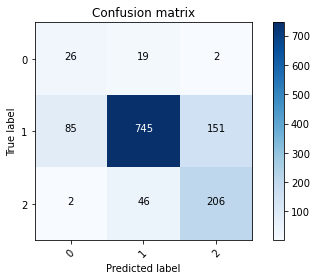

In [51]:
# Confusion Matrix for the test data
cnf_matrix_test_rf = confusion_matrix(target_test, predictions_test_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Test Data:")
display(plot_confusion_matrix(cnf_matrix_test_rf, classes=np.array([0,1,2])))

### Feature Selection
On the basis of the model with the hypertuning of the parameters, oversampling and without outliers.

[0.01 0.06 0.11 0.08 0.07 0.07 0.13 0.08 0.09 0.05 0.08 0.16]


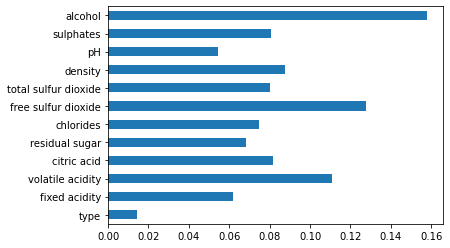

In [52]:
# Feature Importance

print(random_forest.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(random_forest.feature_importances_, index=features.columns)
feat_importances.plot(kind='barh')
plt.show()

Text(0.5, 0, 'Permutation Importance')

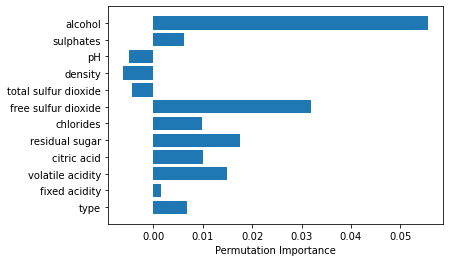

In [53]:
# Permutation Importance

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(random_forest, data_test, target_test)

feature_list = list(features)
plt.barh(feature_list, perm_importance.importances_mean)
plt.xlabel("Permutation Importance")

In [54]:
# Feature correlation

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

wines = wine_data.copy()
y_ql = wines.drop(columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
#scale = StandardScaler()

def VRF(predict, data, y):
   
    scale = StandardScaler(with_std=False)
    df = pd.DataFrame(scale.fit_transform(data), columns= cols)
    features = "+".join(cols)
    df['quality_label'] = y.values

    # get y and X dataframes based on this regression:
    y, X = dmatrices(predict + ' ~' + features, data = df, return_type='dataframe')

   # Calculate VIF Factors
    # For each X, calculate VIF and save in dataframe
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns

    # Inspect VIF Factors
    display(vif.sort_values('VIF Factor'))
    return vif

cols = wines.columns.str.replace(' ', '_')
df = wines.copy()
df.columns = cols
# Remove the not applied to the qualty classification task
#cols = list(cols.drop(['type', 'quality', 'quality']))

vif = VRF('quality', df.loc[:, cols], y_ql)

,VIF Factor,features
0,1.000000,Intercept
13,1.241384,quality
11,1.570609,sulphates
4,1.621567,citric_acid
6,1.660250,chlorides
3,2.225207,volatile_acidity
7,2.246250,free_sulfur_dioxide
10,2.570668,pH
8,4.047711,total_sulfur_dioxide
2,5.085770,fixed_acidity


####  Feature Importance: Model without type

Makro F1-Score Train Data:


0.9380449313121125

Makro F1-Score Test Data:


0.6094263998365771

Makro Precision Train Data:


0.9393587555109436

Makro Precision Test Data:


0.5742439622721313

Makro Recall Train Data:


0.9386748320149697

Makro Recall Test Data:


0.704963781895667

Accuracy Score Train Data:


0.876754970384581

Accuracy Score Test Data:


0.8073169990272373

Confusion Matrix Train Data:


None

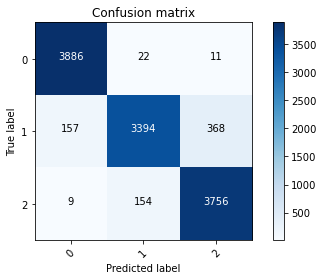

In [55]:
# Seperation of features and the target variable in two different data frames
features = wine_data_outliers.drop(columns=['quality', 'type'])
target = wine_data_outliers.drop(columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
target = target['quality'].ravel()

# Train test split
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    features, target,test_size=0.2, random_state=42, stratify=target)

# Oversampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

data_train_smt = data_train.copy() # necessary? 
target_train_smt = target_train.copy() # necessary?

smt = SMOTE(random_state=42)
data_train, target_train = smt.fit_resample(data_train_smt, target_train_smt)

# Create estimator and pipeline
random_forest = RandomForestClassifier(random_state=0, max_depth = 11, n_estimators = 500, max_features=0.3, min_samples_leaf=3,
    min_samples_split=8)
pipeline_rf = Pipeline([('estimator', random_forest)])

# Fit the model and predict the values for the train data
pipeline_rf.fit(data_train, target_train)
predictions_train_rf = pipeline_rf.predict(data_train)

# Predict values for the test data
predictions_test_rf = pipeline_rf.predict(data_test)

from sklearn.metrics import f1_score

# Makro F1-Score
print("Makro F1-Score Train Data:")
f1_score_train_rf = f1_score(target_train, predictions_train_rf, average='macro')
display(f1_score_train_rf)

print("Makro F1-Score Test Data:")
f1_score_test_rf = f1_score(target_test, predictions_test_rf, average='macro')
display(f1_score_test_rf)

# Makro Precision Score
from sklearn.metrics import precision_score
print("Makro Precision Train Data:")
precision_train_rf = precision_score(target_train, predictions_train_rf, average='macro', zero_division = 0)
display(precision_train_rf)

print("Makro Precision Test Data:")
precision_test_rf = precision_score(target_test, predictions_test_rf, average='macro', zero_division = 0)
display(precision_test_rf)

# Makro Recall Score
from sklearn.metrics import recall_score
print("Makro Recall Train Data:")
recall_train_rf = recall_score(target_train, predictions_train_rf, average='macro')
display(recall_train_rf)

print("Makro Recall Test Data:")
recall_test_rf = recall_score(target_test, predictions_test_rf, average='macro')
display(recall_test_rf)

# Accuracy Score for the train data
print("Accuracy Score Train Data:")
accuracy_score_train_rf = cross_val_score(random_forest, data_train, target_train, cv=5, scoring="accuracy").mean()
display(accuracy_score_train_rf)

# Accuracy Score for the test data
print("Accuracy Score Test Data:")
accuracy_score_test_rf = cross_val_score(random_forest, data_test, target_test, cv=5, scoring="accuracy").mean()
display(accuracy_score_test_rf)

# Confusion Matrix for the training data
cnf_matrix_train_rf = confusion_matrix(target_train, predictions_train_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Train Data:")
display(plot_confusion_matrix(cnf_matrix_train_rf, classes=np.array([0,1,2])))

Confusion Matrix Test Data:


None

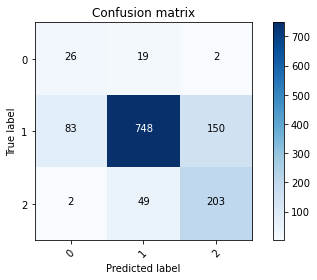

In [56]:
# Confusion Matrix for the test data
cnf_matrix_test_rf = confusion_matrix(target_test, predictions_test_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Test Data:")
display(plot_confusion_matrix(cnf_matrix_test_rf, classes=np.array([0,1,2])))

#### Feature Permutation: Model without ph, density and total sulfur dioxide

Makro F1-Score Train Data:


0.9223243867169595

Makro F1-Score Test Data:


0.6073639702421912

Makro Precision Train Data:


0.9241210298855252

Makro Precision Test Data:


0.5721087790994014

Makro Recall Train Data:


0.923109636812112

Makro Recall Test Data:


0.7080721512387567

Accuracy Score Train Data:


0.863061455973287

Accuracy Score Test Data:


0.8057605787937743

Confusion Matrix Train Data:


None

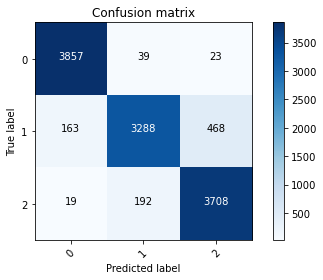

In [58]:
# Seperation of features and the target variable in two different data frames
features = wine_data_outliers.drop(columns=['quality', 'type', 'fixed acidity', 'pH', 'density'])
target = wine_data_outliers.drop(columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
target = target['quality'].ravel()

# Train test split
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    features, target,test_size=0.2, random_state=42, stratify=target)

# Oversampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

data_train_smt = data_train.copy() # necessary? 
target_train_smt = target_train.copy() # necessary?

smt = SMOTE(random_state=42)
data_train, target_train = smt.fit_resample(data_train_smt, target_train_smt)

# Create estimator and pipeline
random_forest = RandomForestClassifier(random_state=0, max_depth = 11, n_estimators = 500, max_features=0.3, min_samples_leaf=3,
    min_samples_split=8)
pipeline_rf = Pipeline([('estimator', random_forest)])

# Fit the model and predict the values for the train data
pipeline_rf.fit(data_train, target_train)
predictions_train_rf = pipeline_rf.predict(data_train)

# Predict values for the test data
predictions_test_rf = pipeline_rf.predict(data_test)

from sklearn.metrics import f1_score

# Makro F1-Score
print("Makro F1-Score Train Data:")
f1_score_train_rf = f1_score(target_train, predictions_train_rf, average='macro')
display(f1_score_train_rf)

print("Makro F1-Score Test Data:")
f1_score_test_rf = f1_score(target_test, predictions_test_rf, average='macro')
display(f1_score_test_rf)

# Makro Precision Score
from sklearn.metrics import precision_score
print("Makro Precision Train Data:")
precision_train_rf = precision_score(target_train, predictions_train_rf, average='macro', zero_division = 0)
display(precision_train_rf)

print("Makro Precision Test Data:")
precision_test_rf = precision_score(target_test, predictions_test_rf, average='macro', zero_division = 0)
display(precision_test_rf)

# Makro Recall Score
from sklearn.metrics import recall_score
print("Makro Recall Train Data:")
recall_train_rf = recall_score(target_train, predictions_train_rf, average='macro')
display(recall_train_rf)

print("Makro Recall Test Data:")
recall_test_rf = recall_score(target_test, predictions_test_rf, average='macro')
display(recall_test_rf)

# Accuracy Score for the train data
print("Accuracy Score Train Data:")
accuracy_score_train_rf = cross_val_score(random_forest, data_train, target_train, cv=5, scoring="accuracy").mean()
display(accuracy_score_train_rf)

# Accuracy Score for the test data
print("Accuracy Score Test Data:")
accuracy_score_test_rf = cross_val_score(random_forest, data_test, target_test, cv=5, scoring="accuracy").mean()
display(accuracy_score_test_rf)

# Confusion Matrix for the training data
cnf_matrix_train_rf = confusion_matrix(target_train, predictions_train_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Train Data:")
display(plot_confusion_matrix(cnf_matrix_train_rf, classes=np.array([0,1,2])))

Confusion Matrix Test Data:


None

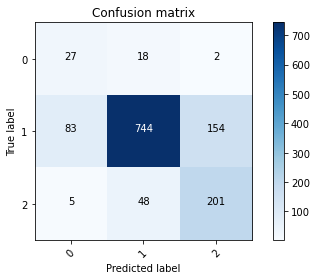

In [59]:
# Confusion Matrix for the test data
cnf_matrix_test_rf = confusion_matrix(target_test, predictions_test_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Test Data:")
display(plot_confusion_matrix(cnf_matrix_test_rf, classes=np.array([0,1,2])))

#### Feature Correlation: Model without fixed acidity, alcohol, type, residual sugar and density

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates
0,0.126667,0.216867,0.059801,0.152778,0.377880,0.217054,0.129213
1,0.146667,0.204819,0.066445,0.045139,0.290323,0.449612,0.151685
2,0.133333,0.240964,0.068106,0.100694,0.209677,0.418605,0.123596
3,0.100000,0.192771,0.081395,0.159722,0.414747,0.364341,0.101124
4,0.100000,0.192771,0.081395,0.159722,0.414747,0.364341,0.101124


Makro F1-Score Train Data:


0.9073728816353824

Makro F1-Score Test Data:


0.5792151680448895

Makro Precision Train Data:


0.9098332454047456

Makro Precision Test Data:


0.5484952960674363

Makro Recall Train Data:


0.9084800544356554

Makro Recall Test Data:


0.7014237167260203

Accuracy Score Train Data:


0.8382254113895666

Accuracy Score Test Data:


0.785484557392996

Confusion Matrix Train Data:


None

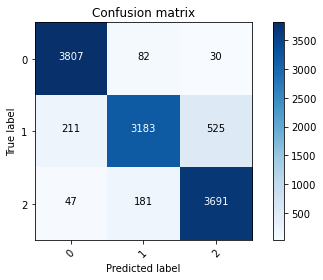

In [60]:
# Seperation of features and the target variable in two different data frames
features = wine_data_outliers.drop(columns=['quality', 'type', 'fixed acidity', 'alcohol', 'density', 'residual sugar'])
display(features.head())
target = wine_data_outliers.drop(columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
target = target['quality'].ravel()

# Train test split
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    features, target,test_size=0.2, random_state=42, stratify=target)

# Oversampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

data_train_smt = data_train.copy() # necessary? 
target_train_smt = target_train.copy() # necessary?

smt = SMOTE(random_state=42)
data_train, target_train = smt.fit_resample(data_train_smt, target_train_smt)

# Create estimator and pipeline
random_forest = RandomForestClassifier(random_state=0, max_depth = 11, n_estimators = 500, max_features=0.3, min_samples_leaf=3,
    min_samples_split=8)
pipeline_rf = Pipeline([('estimator', random_forest)])

# Fit the model and predict the values for the train data
pipeline_rf.fit(data_train, target_train)
predictions_train_rf = pipeline_rf.predict(data_train)

# Predict values for the test data
predictions_test_rf = pipeline_rf.predict(data_test)

from sklearn.metrics import f1_score

# Makro F1-Score
print("Makro F1-Score Train Data:")
f1_score_train_rf = f1_score(target_train, predictions_train_rf, average='macro')
display(f1_score_train_rf)

print("Makro F1-Score Test Data:")
f1_score_test_rf = f1_score(target_test, predictions_test_rf, average='macro')
display(f1_score_test_rf)

# Makro Precision Score
from sklearn.metrics import precision_score
print("Makro Precision Train Data:")
precision_train_rf = precision_score(target_train, predictions_train_rf, average='macro', zero_division = 0)
display(precision_train_rf)

print("Makro Precision Test Data:")
precision_test_rf = precision_score(target_test, predictions_test_rf, average='macro', zero_division = 0)
display(precision_test_rf)

# Makro Recall Score
from sklearn.metrics import recall_score
print("Makro Recall Train Data:")
recall_train_rf = recall_score(target_train, predictions_train_rf, average='macro')
display(recall_train_rf)

print("Makro Recall Test Data:")
recall_test_rf = recall_score(target_test, predictions_test_rf, average='macro')
display(recall_test_rf)

# Accuracy Score for the train data
print("Accuracy Score Train Data:")
accuracy_score_train_rf = cross_val_score(random_forest, data_train, target_train, cv=5, scoring="accuracy").mean()
display(accuracy_score_train_rf)

# Accuracy Score for the test data
print("Accuracy Score Test Data:")
accuracy_score_test_rf = cross_val_score(random_forest, data_test, target_test, cv=5, scoring="accuracy").mean()
display(accuracy_score_test_rf)

# Confusion Matrix for the training data
cnf_matrix_train_rf = confusion_matrix(target_train, predictions_train_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Train Data:")
display(plot_confusion_matrix(cnf_matrix_train_rf, classes=np.array([0,1,2])))

Confusion Matrix Test Data:


None

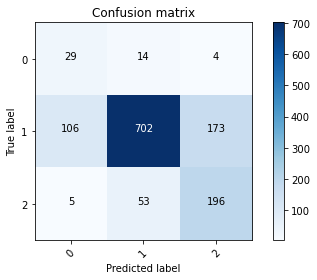

In [61]:
# Confusion Matrix for the test data
cnf_matrix_test_rf = confusion_matrix(target_test, predictions_test_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Test Data:")
display(plot_confusion_matrix(cnf_matrix_test_rf, classes=np.array([0,1,2])))

### Reducing Test Data
On the basis of the model with the hypertuning of the parameters, oversampling and without outliers.

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362


Makro F1-Score Train Data:


0.9342069078082362

Makro F1-Score Test Data:


0.6174281826863953

Makro Precision Train Data:


0.9354649505731295

Makro Precision Test Data:


0.5799569101118949

Makro Recall Train Data:


0.9347739095638254

Makro Recall Test Data:


0.7242789513466206

Accuracy Score Train Data:


0.8723489395758304

Accuracy Score Test Data:


0.8002158894645941

Confusion Matrix Train Data:


None

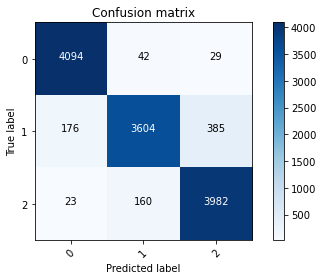

In [62]:
# Seperation of features and the target variable in two different data frames
features = wine_data_outliers.drop(columns=['quality'])
display(features.head())
target = wine_data_outliers.drop(columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
target = target['quality'].ravel()

# Train test split
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    features, target,test_size=0.15, random_state=42, stratify=target)

# Oversampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

data_train_smt = data_train.copy() 
target_train_smt = target_train.copy()

smt = SMOTE(random_state=42)
data_train, target_train = smt.fit_resample(data_train_smt, target_train_smt)

# Create estimator and pipeline
random_forest = RandomForestClassifier(random_state=0, max_depth = 11, n_estimators = 500, max_features=0.3, min_samples_leaf=3,
    min_samples_split=8)
pipeline_rf = Pipeline([('estimator', random_forest)])

# Fit the model and predict the values for the train data
pipeline_rf.fit(data_train, target_train)
predictions_train_rf = pipeline_rf.predict(data_train)

# Predict values for the test data
predictions_test_rf = pipeline_rf.predict(data_test)

from sklearn.metrics import f1_score

# Makro F1-Score
print("Makro F1-Score Train Data:")
f1_score_train_rf = f1_score(target_train, predictions_train_rf, average='macro')
display(f1_score_train_rf)

print("Makro F1-Score Test Data:")
f1_score_test_rf = f1_score(target_test, predictions_test_rf, average='macro')
display(f1_score_test_rf)

# Makro Precision Score
from sklearn.metrics import precision_score
print("Makro Precision Train Data:")
precision_train_rf = precision_score(target_train, predictions_train_rf, average='macro', zero_division = 0)
display(precision_train_rf)

print("Makro Precision Test Data:")
precision_test_rf = precision_score(target_test, predictions_test_rf, average='macro', zero_division = 0)
display(precision_test_rf)

# Makro Recall Score
from sklearn.metrics import recall_score
print("Makro Recall Train Data:")
recall_train_rf = recall_score(target_train, predictions_train_rf, average='macro')
display(recall_train_rf)

print("Makro Recall Test Data:")
recall_test_rf = recall_score(target_test, predictions_test_rf, average='macro')
display(recall_test_rf)

# Accuracy Score for the train data
print("Accuracy Score Train Data:")
accuracy_score_train_rf = cross_val_score(random_forest, data_train, target_train, cv=5, scoring="accuracy").mean()
display(accuracy_score_train_rf)

# Accuracy Score for the test data
print("Accuracy Score Test Data:")
accuracy_score_test_rf = cross_val_score(random_forest, data_test, target_test, cv=5, scoring="accuracy").mean()
display(accuracy_score_test_rf)

# Confusion Matrix for the training data
cnf_matrix_train_rf = confusion_matrix(target_train, predictions_train_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Train Data:")
display(plot_confusion_matrix(cnf_matrix_train_rf, classes=np.array([0,1,2])))

Confusion Matrix Test Data:


None

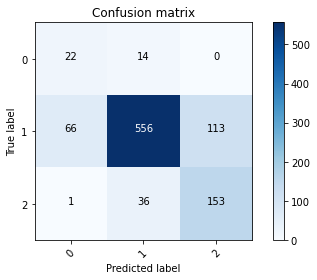

In [63]:
# Confusion Matrix for the test data
cnf_matrix_test_rf = confusion_matrix(target_test, predictions_test_rf)
np.set_printoptions(precision=2)
print("Confusion Matrix Test Data:")
display(plot_confusion_matrix(cnf_matrix_test_rf, classes=np.array([0,1,2])))